In [215]:
# -------------------------------- Importações ------------------------------- #
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
# -------------------------------- Data Frame -------------------------------- #
df = pd.read_excel('massa-tamanho-habitati.xls')
ali = pd.read_excel('habitos_alimentares_certo.xls')

df = df.merge(ali)

display(df)

,Species,Class,Habitat Regions,Mass - average - g,Mass - adult - average - g,Mass - adult - female - average - g,Mass - adult - male - average - g,Length - average - mm,Length - adult - average - mm,Length - adult - female - average - mm,Length - adult - male - average - mm,Length - neonate - average - mm,Primary Diet
0,Acomys cahirinus,Mammalia,Temperate\nTerrestrial,50.00,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,Omnivore
1,Aconaemys fuscus,Mammalia,Temperate\nTerrestrial,50.00,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,Herbivore\nHerbivore :: Folivore\nHerbivore ::...
2,Akodon azarae,Mammalia,Tropical\nTerrestrial,19.00,NaN,NaN,NaN,182.5,NaN,NaN,NaN,NaN,Omnivore
3,Akodon montensis,Mammalia,Temperate\nTropical\nTerrestrial,42.00,NaN,NaN,NaN,113.0,NaN,NaN,NaN,NaN,Omnivore
4,Akodon philipmyersi,Mammalia,Tropical\nTerrestrial,23.00,NaN,NaN,NaN,93.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Xerus inauris,Mammalia,Tropical\nTerrestrial,528.50,NaN,NaN,NaN,455.5,NaN,NaN,NaN,NaN,Omnivore
247,Zapus hudsonius,Mammalia,Temperate\nTerrestrial,18.25,NaN,NaN,NaN,210.0,NaN,NaN,NaN,NaN,Herbivore\nHerbivore :: Granivore
248,Zapus princeps,Mammalia,Temperate\nTerrestrial,NaN,NaN,NaN,NaN,237.5,NaN,NaN,NaN,NaN,NaN
249,Zenkerella insignis,Mammalia,Tropical\nTerrestrial,200.00,NaN,NaN,NaN,220.0,NaN,NaN,NaN,NaN,Herbivore\nHerbivore :: Lignivore


In [217]:
# ------------------------ Separando habitats e dietas ----------------------- #

df = df.dropna(subset=['Primary Diet'])

# Separando a coluna 'Habitat Regions'
temp = df["Habitat Regions"].str.split("\n", n=1, expand=True)
df["Habitat"] = temp[0]
df.drop(columns=["Habitat Regions"], inplace=True)

# Separando a coluna 'Primary Diet'
temp2 = df["Primary Diet"].str.split("::", n=1, expand=True)
temp3 = temp2[0].str.split("\n", n=1, expand=True)

# Criando uma nova coluna 'Diet' com base na condição
df["Diet"] = temp3[0]
df.loc[df["Diet"].str.contains("Herbivore"), "Diet"] = temp2[1]

# Realizando uma segunda divisão apenas na primeira parte obtida da segunda divisão
df["First Diet"] = df["Diet"].str.split("\nHerbivore", n=1, expand=True)[0]
df["Dieti"] = df["First Diet"].str.split("\nCoprophage", n=1, expand=True)[0]
df["Dietii"] = df["Dieti"].str.split("\nMycophage", n=1, expand=True)[0]
df["Dietti"] = df["Dietii"].str.split("\nOmnivore", n=1, expand=True)[0]


# Exibindo o DataFrame resultante
display(df)

,Species,Class,Mass - average - g,Mass - adult - average - g,Mass - adult - female - average - g,Mass - adult - male - average - g,Length - average - mm,Length - adult - average - mm,Length - adult - female - average - mm,Length - adult - male - average - mm,Length - neonate - average - mm,Primary Diet,Habitat,Diet,First Diet,Dieti,Dietii,Dietti
0,Acomys cahirinus,Mammalia,50.00,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,Omnivore,Temperate,Omnivore,Omnivore,Omnivore,Omnivore,Omnivore
1,Aconaemys fuscus,Mammalia,50.00,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,Herbivore\nHerbivore :: Folivore\nHerbivore ::...,Temperate,Folivore\nHerbivore :: Granivore\nHerbivore :...,Folivore,Folivore,Folivore,Folivore
2,Akodon azarae,Mammalia,19.00,NaN,NaN,NaN,182.5,NaN,NaN,NaN,NaN,Omnivore,Tropical,Omnivore,Omnivore,Omnivore,Omnivore,Omnivore
3,Akodon montensis,Mammalia,42.00,NaN,NaN,NaN,113.0,NaN,NaN,NaN,NaN,Omnivore,Temperate,Omnivore,Omnivore,Omnivore,Omnivore,Omnivore
5,Allactaga euphratica,Mammalia,35.90,NaN,NaN,NaN,270.0,NaN,NaN,NaN,NaN,Herbivore\nHerbivore :: Granivore,Temperate,Granivore,Granivore,Granivore,Granivore,Granivore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Xerus erythropus,Mammalia,622.50,NaN,NaN,NaN,333.0,NaN,NaN,NaN,NaN,Omnivore,Tropical,Omnivore,Omnivore,Omnivore,Omnivore,Omnivore
246,Xerus inauris,Mammalia,528.50,NaN,NaN,NaN,455.5,NaN,NaN,NaN,NaN,Omnivore,Tropical,Omnivore,Omnivore,Omnivore,Omnivore,Omnivore
247,Zapus hudsonius,Mammalia,18.25,NaN,NaN,NaN,210.0,NaN,NaN,NaN,NaN,Herbivore\nHerbivore :: Granivore,Temperate,Granivore,Granivore,Granivore,Granivore,Granivore
249,Zenkerella insignis,Mammalia,200.00,NaN,NaN,NaN,220.0,NaN,NaN,NaN,NaN,Herbivore\nHerbivore :: Lignivore,Tropical,Lignivore,Lignivore,Lignivore,Lignivore,Lignivore


In [218]:
# ------------------ Tirando dados faltantes e indiferentes ------------------ #
df = df.drop(columns=["Class", "Mass - adult - average - g", "Mass - adult - female - average - g", "Mass - adult - male - average - g", "Length - adult - female - average - mm", "Length - adult - average - mm", "Length - adult - male - average - mm", "Length - neonate - average - mm", "Primary Diet", "Diet", "First Diet", "Dieti", "Dietii"])
df = df.rename(columns={"Mass - average - g":"Mass"})
df = df.rename(columns={"Length - average - mm":"Length"})

df.to_csv('habito-habitati-massa-tamanho.csv', index=False)

display(df)

,Species,Mass,Length,Habitat,Dietti
0,Acomys cahirinus,50.00,120.0,Temperate,Omnivore
1,Aconaemys fuscus,50.00,120.0,Temperate,Folivore
2,Akodon azarae,19.00,182.5,Tropical,Omnivore
3,Akodon montensis,42.00,113.0,Temperate,Omnivore
5,Allactaga euphratica,35.90,270.0,Temperate,Granivore
...,...,...,...,...,...
245,Xerus erythropus,622.50,333.0,Tropical,Omnivore
246,Xerus inauris,528.50,455.5,Tropical,Omnivore
247,Zapus hudsonius,18.25,210.0,Temperate,Granivore
249,Zenkerella insignis,200.00,220.0,Tropical,Lignivore


In [219]:
# ----------------------------- Data Frame Tratado ------------------------- #

df = pd.read_csv('habito-habitati-massa-tamanho.csv')

display (df)

,Species,Mass,Length,Habitat,Dietti
0,Acomys cahirinus,50.00,120.0,Temperate,Omnivore
1,Aconaemys fuscus,50.00,120.0,Temperate,Folivore
2,Akodon azarae,19.00,182.5,Tropical,Omnivore
3,Akodon montensis,42.00,113.0,Temperate,Omnivore
4,Allactaga euphratica,35.90,270.0,Temperate,Granivore
...,...,...,...,...,...
235,Xerus erythropus,622.50,333.0,Tropical,Omnivore
236,Xerus inauris,528.50,455.5,Tropical,Omnivore
237,Zapus hudsonius,18.25,210.0,Temperate,Granivore
238,Zenkerella insignis,200.00,220.0,Tropical,Lignivore


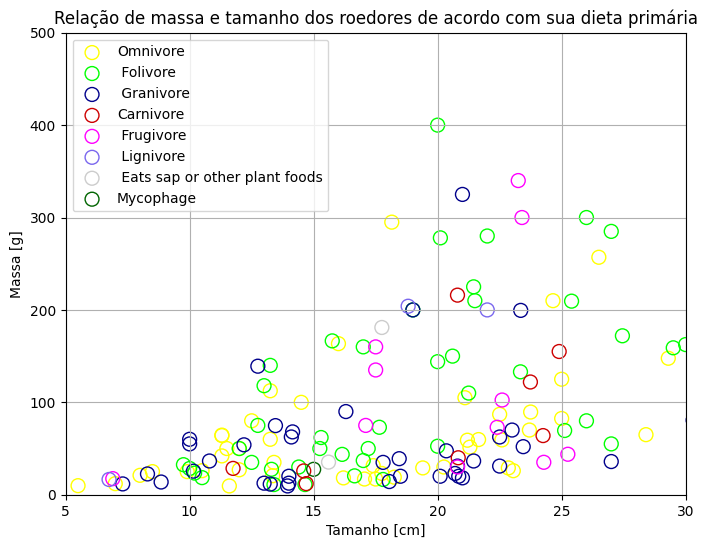

In [220]:
# ----------------------------- Gráfico 1 ------------------------- #

# Retirando NaN
df = df.dropna()

# Defina um dicionário de cores com base na coluna 'Diet'
colors = {'Omnivore': '#FFFF00', 'Mycophage': '#006400', ' Folivore': '#00FF00', ' Granivore': '#00008B', 'Carnivore': '#CD0000', ' Lignivore': '#7A67EE', ' Frugivore': '#FF00FF', ' Eats sap or other plant foods': '#cccccc'}

# Extraia os dados das colunas 'Length' e 'Mass'
x = df['Length'] / 10
y = df['Mass']

# Extraia a coluna 'Diet' para determinar a cor de cada ponto
diet_colors = [colors[first_diet] for first_diet in df['Dietti']]

# Crie o gráfico de pontos com marcadores e cores diferentes com base na dieta
plt.figure(figsize=(8, 6))

for i, first_diet in enumerate(df['Dietti'].unique()):
    plt.scatter(x[df['Dietti'] == first_diet], y[df['Dietti'] == first_diet], label=first_diet, c='None', marker= 'o', s=100, edgecolors=colors[first_diet])

plt.title('Relação de massa e tamanho dos roedores de acordo com sua dieta primária')
plt.xlabel("Tamanho [cm]")
plt.ylabel("Massa [g]")
plt.legend()
plt.grid()
plt.savefig("Geral-Dieta-Massa-Tamanho.png")
plt.xlim(5,30)
plt.ylim(0,500)
plt.savefig("Zoom-Dieta-Massa-Tamanho.png")
plt.show()


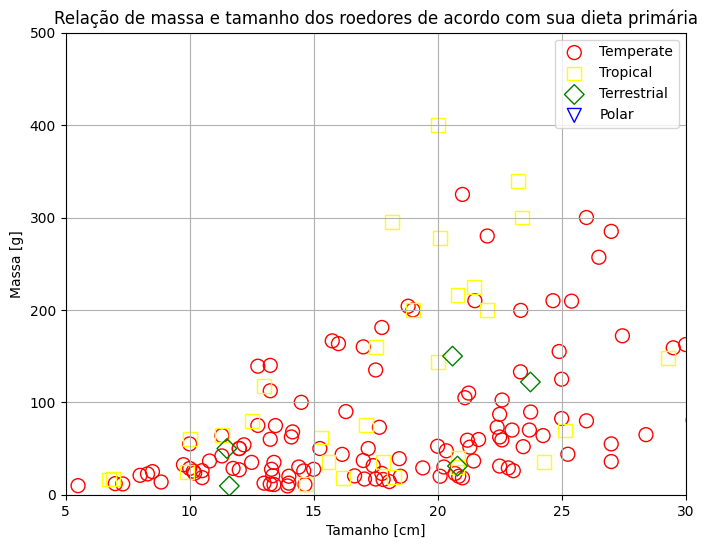

In [221]:
# ----------------------------- Gráfico 2 ------------------------- #

# Retirando NaN
df = df.dropna()

# Defina um dicionário de cores com base na coluna 'Diet'
colors = {'Temperate': 'red', 'Tropical': 'yellow', 'Terrestrial': 'green', 'Polar': 'blue'}

# Extraia os dados das colunas 'Length' e 'Mass'
x = df['Length'] / 10
y = df['Mass']

# Extraia a coluna 'Habitati' para determinar a cor de cada ponto
diet_colors = [colors[habitati] for habitati in df['Habitat']]

# Crie o gráfico de pontos com marcadores e cores diferentes com base no habitat
plt.figure(figsize=(8, 6))

#Marcadores diferentes para cada categoria de habitat
markers = ['o', 's', 'D', 'v']  

for i, habitati in enumerate(df['Habitat'].unique()):
    plt.scatter(x[df['Habitat'] == habitati], y[df['Habitat'] == habitati], label=habitati, c='None', marker= markers[i], s=100, edgecolors=colors[habitati])

plt.title('Relação de massa e tamanho dos roedores de acordo com sua dieta primária')
plt.xlabel("Tamanho [cm]")
plt.ylabel("Massa [g]")
plt.legend()
plt.grid()
plt.savefig("Geral-Habitati-Massa-Tamanho.png")
plt.xlim(5,30)
plt.ylim(0,500)
plt.savefig("Zoom-Habitati-Massa-Tamanho.png")
plt.show()